In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from pypalettes import load_cmap

In [2]:
# Settings
x = 6  # Want figures to be A6
plt.rc('figure', figsize=[46.82 * .5**(.5 * x), 33.11 * .5**(.5 * x)])


# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [3]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/storms.csv"
df_storms = pd.read_csv(url)
#df_storms = pd.read_csv(open_url(url))
df_storms.head()

,year,status,n
0,2010,hurricane,163.0
1,2010,tropical depression,72.0
2,2010,tropical storm,212.0
3,2010,tropical wave,0.0
4,2011,hurricane,106.0


In [4]:


url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/footprint.csv"
df_footprint = pd.read_csv(url)
df_footprint.head()

,lifexp,country,region,gdpCapita,populationMillions,footprint,biocapacity,ecoReserve,earthsRequired,ratio
0,76.0,Albania,Other Europe,14889.0,2.9,2.1,1.176752,-0.894486,1.371485,1.784573
1,62.0,Angola,Africa,6304.0,35.0,0.9,1.588191,0.730346,0.568029,0.566682
2,75.0,Argentina,South America,22117.0,46.0,3.2,5.231663,2.011045,2.132556,0.611660
3,83.0,Australia,Asia-Pacific,53053.0,26.1,5.8,11.021401,5.244362,3.825307,0.526249
4,81.0,Austria,EU-27,55460.0,9.1,5.6,2.893775,-2.732866,3.725721,1.935189


In [5]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv"
df_mario = pd.read_csv(url)
df_mario.head()

,track,type,shortcut,player,system_played,date,time_period,time,record_duration
0,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-15,2M 12.99S,132.99,1
1,Luigi Raceway,Three Lap,No,Booth,NTSC,1997-02-16,2M 9.99S,129.99,0
2,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-16,2M 8.99S,128.99,12
3,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-28,2M 6.99S,126.99,7
4,Luigi Raceway,Three Lap,No,Gregg G,NTSC,1997-03-07,2M 4.51S,124.51,54


# 1. Storms

In [6]:
df_storms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    52 non-null     int64  
 1   status  52 non-null     object 
 2   n       52 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [7]:
status_values = df_storms.groupby(['status'], as_index=False).agg(size=("n", "sum")).sort_values(by=["size"], ascending=False)["status"].to_list()
status_values

['tropical storm', 'hurricane', 'tropical depression', 'tropical wave']

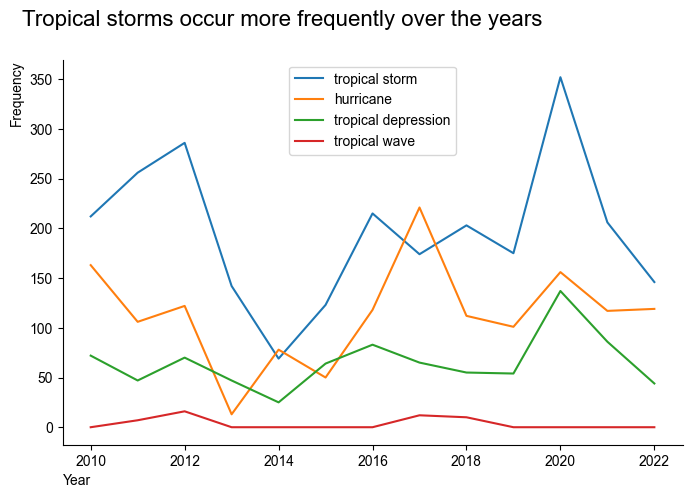

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

for value in status_values:
    tmp = df_storms[df_storms["status"]==value]
    ax.plot(tmp["year"], tmp["n"], label=value)

ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylabel("Frequency", loc="top")
ax.set_xlabel("Year", loc="left")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)
#ax.set_title("Number of Storms Over Time", loc="left")

plt.legend()
plt.show()

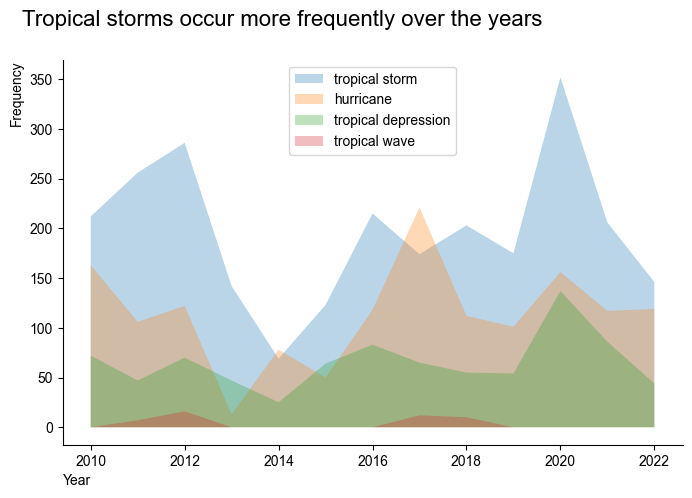

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

for value in status_values:
    tmp = df_storms[df_storms["status"]==value]
    ax.fill_between(tmp["year"], tmp["n"], label=value, alpha=0.3)

ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylabel("Frequency", loc="top")
ax.set_xlabel("Year", loc="left")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)
plt.legend()
plt.show()

In [10]:
df_storms.head()

,year,status,n
0,2010,hurricane,163.0
1,2010,tropical depression,72.0
2,2010,tropical storm,212.0
3,2010,tropical wave,0.0
4,2011,hurricane,106.0


In [11]:
tmp = pd.pivot(df_storms, index="year", columns="status", values="n").reset_index()
tmp.head()

status,year,hurricane,tropical depression,tropical storm,tropical wave
0,2010,163.0,72.0,212.0,0.0
1,2011,106.0,47.0,256.0,7.0
2,2012,122.0,70.0,286.0,16.0
3,2013,13.0,47.0,142.0,0.0
4,2014,78.0,25.0,69.0,0.0


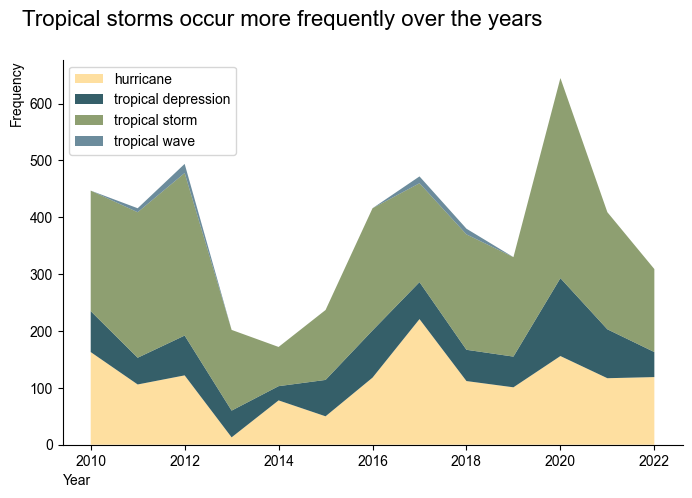

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

tmp = pd.pivot(df_storms, index="year", columns="status", values="n").reset_index()
ax.stackplot(tmp["year"], tmp["hurricane"], tmp["tropical depression"], tmp["tropical storm"], tmp["tropical wave"], alpha=0.8, labels=["hurricane", "tropical depression", "tropical storm", "tropical wave"], colors = ["#FED789", "#023743", "#72874E", "#476F84"])

ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylabel("Frequency", loc="top")
ax.set_xlabel("Year", loc="left")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)
plt.legend()
plt.show()

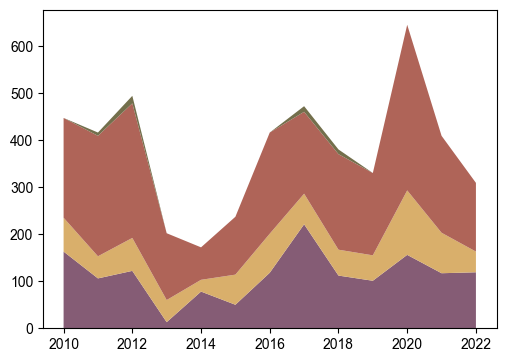

In [13]:
pivot_df = df_storms.pivot_table(
   index='year', # year is now the index
   columns='status', # column are the kind of storm
   values='n' # df content is taken from the 'n' column
)
values = [
   pivot_df[status] for status in df_storms["status"].unique()
]
cmap = load_cmap("Antique")
colors = ["#FED789", "#023743", "#72874E", "#476F84"]

fig, ax = plt.subplots()
ax.stackplot(pivot_df.index, values, colors=cmap.colors)
plt.show()

In [14]:
tmp_data = pd.pivot(df_storms,index="year", columns="status", values=["n"] )
#tmp_data.columns = tmp_data.columns.droplevel(0)

#Collapse the MultiIndex
tmp_data.columns = tmp_data.columns.map('_'.join).str.strip()
#Reset Index to get the Name column back
tmp_data = tmp_data.reset_index()
tmp_data.index = tmp_data.year
tmp_data.drop(columns=["year"], axis=1, inplace=True)
tmp_data.head()

,n_hurricane,n_tropical depression,n_tropical storm,n_tropical wave
year,,,,
2010,163.0,72.0,212.0,0.0
2011,106.0,47.0,256.0,7.0
2012,122.0,70.0,286.0,16.0
2013,13.0,47.0,142.0,0.0
2014,78.0,25.0,69.0,0.0


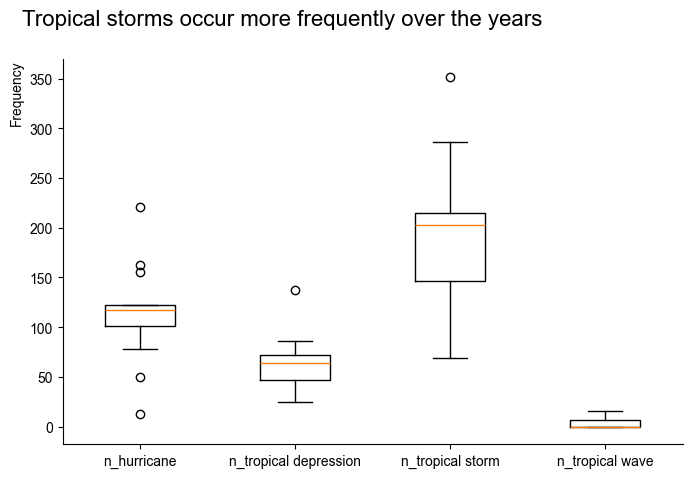

In [15]:
# You can use the column headings from the data frame as labels
labels = list(tmp_data.columns)
# A data frame needs to be converted into an array before it can be plotted this way
tmp_data = np.array(tmp_data)

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(tmp_data, tick_labels=labels)
ax.spines[['right', 'top']].set_visible(False) 

ax.set_ylabel("Frequency", loc="top")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)

plt.show()

In [16]:
df_storms.head()

,year,status,n
0,2010,hurricane,163.0
1,2010,tropical depression,72.0
2,2010,tropical storm,212.0
3,2010,tropical wave,0.0
4,2011,hurricane,106.0


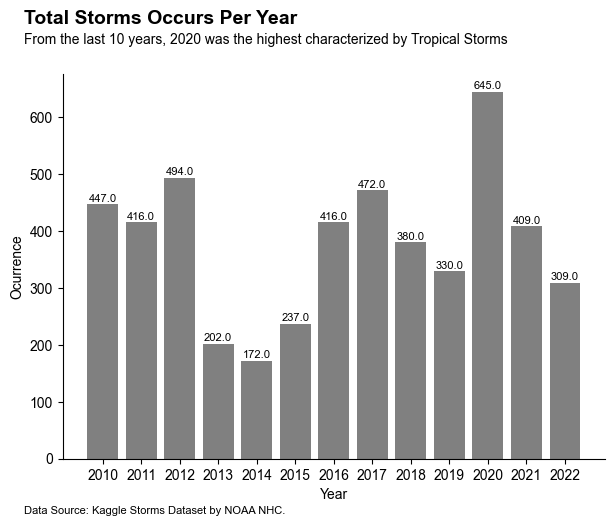

In [17]:
year_agg = df_storms.groupby(by=['year'], as_index=False).agg(
    totaltimesperyear=('n', 'sum')
)

x = year_agg['year']
y = year_agg['totaltimesperyear']

fig, ax = plt.subplots(
    figsize=(7,5)
    )

ax.bar(x, y, color='grey')

for i, value in enumerate(y):
    ax.text(x[i], value + 5, str(value), ha='center', fontsize=8)

fig.text(0.07, 0.98, 'Total Storms Occurs Per Year', fontsize=14, weight='bold')
fig.text(0.07, 0.94, 'From the last 10 years, 2020 was the highest characterized by Tropical Storms', fontsize=10)
fig.text(0.07, 0.001, 'Data Source: Kaggle Storms Dataset by NOAA NHC.', fontsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Year')
plt.ylabel('Ocurrence')

plt.xticks(x)

plt.show()

# 2. Life Expectancy

# 3. Footprint

/var/folders/f3/w2fmvqr108v8svw61xkgnwcw0000gn/T/ipykernel_45705/2620377138.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('RdYlBu_r')


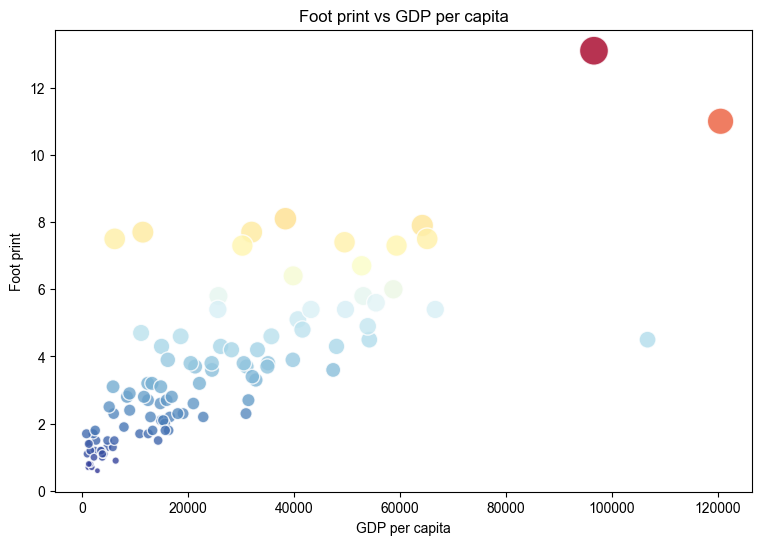

In [18]:
fig, ax = plt.subplots(figsize=(9, 6))
cm = plt.cm.get_cmap('RdYlBu_r')

scale = 50

ax.scatter(
    x=df_footprint["gdpCapita"],
    y=df_footprint["footprint"],
    s=scale*df_footprint["earthsRequired"],
    label="Earths required (proportional size)",
    c=scale*df_footprint["earthsRequired"],
    cmap=cm,
    alpha=0.8,
    edgecolors="white",
    linewidth=1,
)

ax.set_title("Foot print vs GDP per capita")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Foot print")

plt.show()

# 4. Random

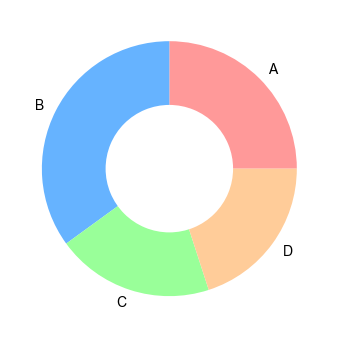

In [19]:
sizes = [25, 35, 20, 20]
labels = ["A", "B", "C", "D"]
colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors)
ax.pie([1], colors="white", radius=0.5)
plt.show()

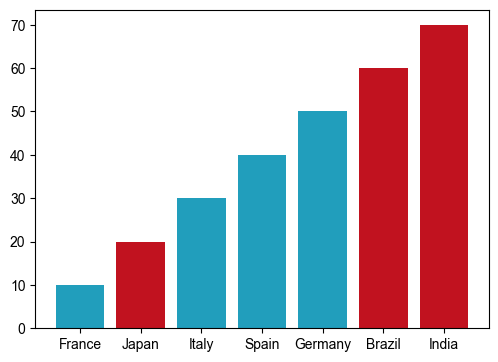

In [20]:
y = [10, 20, 30, 40, 50, 60, 70]
labels = [
   "France", "Japan", "Italy", "Spain",
   "Germany", "Brazil", "India"
]
continents = [
   "Europe", "Asia", "Europe", "Europe",
   "Europe", "South America", "Asia"
]

blue = "#219ebc"
red = "#c1121f"
colors = [
   blue if continent == "Europe" else red
   for continent in continents
]

fig, ax = plt.subplots()
ax.bar(labels, y, color=colors)
plt.show()


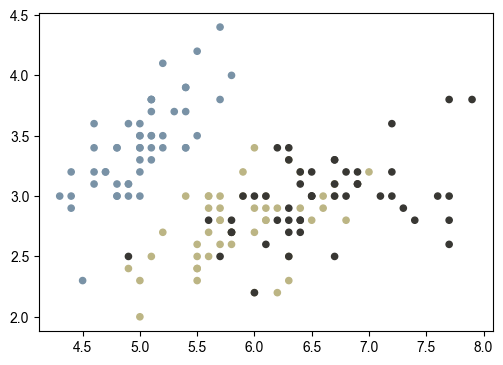

In [21]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/iris.csv"
iris = pd.read_csv(url)

x = iris["sepal_length"]
y = iris["sepal_width"]
c = pd.Categorical(iris["species"]).codes

cmap = load_cmap("Alosa_fallax")

fig, ax = plt.subplots()
ax.scatter(x, y, c=c, cmap=cmap, s=20)
plt.show()